In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
genes = pd.read_csv('./sfari_genes.csv')

In [3]:
genes.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3,0,6
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3,0,3


In [4]:
genes.iplot(title = 'Overlay of Genes Dataset', xaxis_title='Gene Id',
                   )

In [5]:
genes['chromosome'].value_counts()

2      83
1      80
X      76
7      72
3      63
11     57
5      56
17     53
6      51
15     49
19     47
12     43
8      42
9      40
16     36
10     35
4      30
14     27
20     26
22     22
13     14
18     13
21     12
X,Y     2
Y       2
Name: chromosome, dtype: int64

In [6]:
#which chromosome is the most syndromic?
genes['chromosome'].value_counts().iplot(title = 'Most Common Chromosome Mutation', yaxis_title='Total', xaxis_title='Chromosome')

In [7]:
px.line(genes, x=genes['chromosome'], y=genes['syndromic'],labels={'chromosome': 'Chromosome', 'syndromic': 'Syndromic Frequency'}, title = 'Chromosome vs. Sydromic Frequency')

## The graph above shows the relationship between a chromosome and rather or not it is syndromic. This model shows us that the relationship between the two variables represent a genetic network. This means that there are multiple inputs for multiple outputs. What this means is that multiple chromosomes show multiple ASD related syndromes. 

## I was able to dig more into the inner workings of genetic modeling, and found a diagram to help interpret this graph a bit better: 
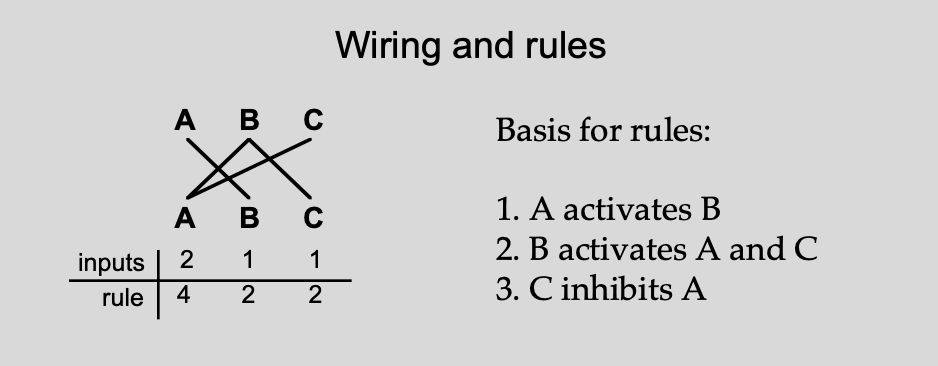

sources: https://psb.stanford.edu/previous/psb99/genetutorial.pdf

In [8]:
px.bar(genes, x=genes['chromosome'], y =genes['syndromic'], title = 'Most Syndromic Chromosome Mutation', labels = {'syndromic':'Total Syndromic Cases', 'chromosome': 'Chromosome'})

## The graph above shows us which chromosomes in those diagnosed with ASD tend to be syndromic. One discovery I'd like to make is rather or not each syndrome listed on one chromosome tends to be the same. In other words, what are the other variants of ASD? Or rather, are all four syndromic cases of ASD that had the 16th gene mutated displaying the same symptoms?

## It is important to note here the difference between a symptom and a syndrome. Symptoms are personal experiences and not easily quatifiable, while syndromes are groups of symptoms that are recognized as a diagnostic entity. 

## There are 793 syndromic cases, and 239 non-syndromic cases.

In [9]:
genes['syndromic'].value_counts()

0    792
1    239
Name: syndromic, dtype: int64

In [10]:
genes.groupby(by = ['ensembl-id'])['syndromic', 'number-of-reports'].sum()

/var/folders/qx/9hkbv9h55h37pzxyqzgzv47h0000gn/T/ipykernel_3279/3301406271.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,syndromic,number-of-reports
ensembl-id,,
ENSG00000001497,0,5
ENSG00000003147,0,8
ENSG00000004468,0,9
ENSG00000004848,1,22
ENSG00000004866,0,4
...,...,...
ENSG00000273749,0,18
ENSG00000275835,0,4
ENSG00000278311,0,2


In [11]:
genes.groupby(by = genes['gene-score']).count()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,syndromic,number-of-reports
gene-score,,,,,,,,
1,206,206,206,205,206,206,206,206
2,198,198,198,191,198,198,198,198
3,477,477,476,475,477,475,477,477
S,150,150,150,150,150,150,150,150


In [12]:
px.bar(pd.DataFrame(genes['gene-score'].value_counts()), title = 'Number of Genes Based on Gene-score', color='value', labels={'index':'Gene-score', 'value':'Total Number of Genes'}, height=400)

## There are 477 score 3 genes, 206 score 1 genes, 198 score 2 genes, and 150 actual syndromic genes.

## Genes with a gene-score of two tend not to be syndromic. 

## Number of reports based on score category

In [13]:
(genes['number-of-reports'].loc[genes['syndromic'] == 1]).count()

239

In [21]:
fig = px.bar(genes, x=genes['number-of-reports'], y=genes['gene-score'], color='number-of-reports', title = 'Number of Reports Based on Gene vs. Gene Score',
             labels={'gene-score':'Gene Score', 'number-of-reports':'Number of Reports Based on Gene'}, height=400)
fig.show()

In [22]:
fig = px.bar(genes, x=genes['number-of-reports'], y=genes['genetic-category'], color='number-of-reports', title = 'Number of Reports Based on Gene Category',
             labels={'genetic-category':'Gene Category', 'number-of-reports':'Number of Reports Based on Gene Category'}, height=400)
fig.show()